In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 4*xs - 5*zs + 9 + noise

np.savez('TF_first_example', inputs = generated_inputs, targets = generated_targets)

## Role of TensorFlow 


In [3]:
training_data = np.load('TF_first_example.npz')

In [14]:
input_size = 2

output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )                       
                            ])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 101.0817
Epoch 2/100
32/32 - 0s - loss: 3.2430
Epoch 3/100
32/32 - 0s - loss: 0.5901
Epoch 4/100
32/32 - 0s - loss: 0.4242
Epoch 5/100
32/32 - 0s - loss: 0.3793
Epoch 6/100
32/32 - 0s - loss: 0.3775
Epoch 7/100
32/32 - 0s - loss: 0.3778
Epoch 8/100
32/32 - 0s - loss: 0.3783
Epoch 9/100
32/32 - 0s - loss: 0.4094
Epoch 10/100
32/32 - 0s - loss: 0.3579
Epoch 11/100
32/32 - 0s - loss: 0.3632
Epoch 12/100
32/32 - 0s - loss: 0.3882
Epoch 13/100
32/32 - 0s - loss: 0.4094
Epoch 14/100
32/32 - 0s - loss: 0.3807
Epoch 15/100
32/32 - 0s - loss: 0.3793
Epoch 16/100
32/32 - 0s - loss: 0.4406
Epoch 17/100
32/32 - 0s - loss: 0.3859
Epoch 18/100
32/32 - 0s - loss: 0.3807
Epoch 19/100
32/32 - 0s - loss: 0.3954
Epoch 20/100
32/32 - 0s - loss: 0.3970
Epoch 21/100
32/32 - 0s - loss: 0.3703
Epoch 22/100
32/32 - 0s - loss: 0.3835
Epoch 23/100
32/32 - 0s - loss: 0.3808
Epoch 24/100
32/32 - 0s - loss: 0.4076
Epoch 25/100
32/32 - 0s - loss: 0.3700
Epoch 26/100
32/32 - 0s - loss: 

## Weights and bias(es) extraction

In [15]:
model.layers[0].get_weights()

[array([[ 3.9706686],
        [-4.927804 ]], dtype=float32),
 array([8.985089], dtype=float32)]

In [16]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 3.9706686],
       [-4.927804 ]], dtype=float32)

In [17]:
bias = model.layers[0].get_weights()[1]
bias

array([8.985089], dtype=float32)

## Time to predict

In [11]:
MP = model.predict_on_batch(training_data['inputs']).round(1)

TD = training_data['targets'].round(1)
TD

array([[-10. ],
       [-19.7],
       [ 50. ],
       [-32.5],
       [ 75.9],
       [ 19.4],
       [-21.6],
       [-30.2],
       [-51.7],
       [ 64.9],
       [ 75.5],
       [ 49.8],
       [-64.8],
       [-13.6],
       [-12.4],
       [ 57.6],
       [ 88. ],
       [ 14. ],
       [ 48.3],
       [ 53.6],
       [-57.2],
       [ 25.3],
       [-46.9],
       [-12.3],
       [-29.8],
       [ 93.8],
       [ -7.1],
       [ 12.4],
       [  2.8],
       [ 16.9],
       [ -6. ],
       [-39.8],
       [-73.2],
       [-25.6],
       [ 47.1],
       [-27.5],
       [  1.2],
       [  5.7],
       [ 65.1],
       [ 22.7],
       [ 74.7],
       [ 66.3],
       [ 22.9],
       [  3.8],
       [ 43.1],
       [-36.5],
       [ 32.4],
       [ 15.4],
       [ 12.5],
       [-57.6],
       [ 69.9],
       [  9.1],
       [ 10.6],
       [ 24.6],
       [-33.3],
       [-22.6],
       [-28.3],
       [ 38. ],
       [-30.4],
       [ 60.5],
       [  4. ],
       [-11.3],
       [

In [12]:
LastDF = np.column_stack((MP,TD))

LastDFP = pd.DataFrame(LastDF, columns=['MP', 'TD'])

LastDFP

,MP,TD
0,-9.300000,-10.0
1,-19.299999,-19.7
2,49.599998,50.0
3,-31.900000,-32.5
4,75.300003,75.9
...,...,...
995,17.900000,16.9
996,-54.000000,-54.0
997,-24.900000,-24.7
998,-31.000000,-30.3


## Plotting the data

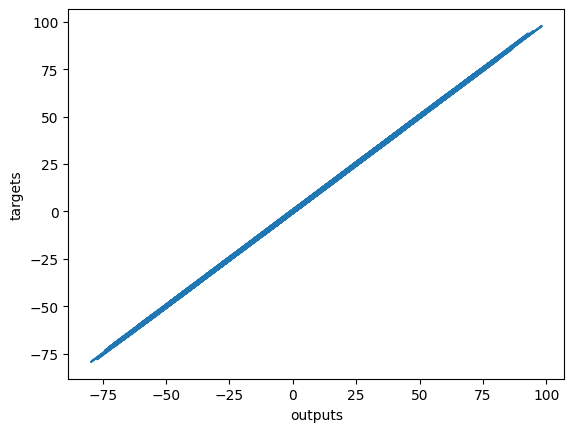

In [13]:
plt.plot(np.squeeze(MP), np.squeeze(TD))

plt.xlabel('outputs')
plt.ylabel('targets')

plt.show()